In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import joblib
import pickle

In [ ]:
# --------------------------------
# Step 2: Load Dataset
# --------------------------------
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df["target"] = cancer.target

print(df.head())
print(df.info())
print(df.describe())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [ ]:
# --------------------------------
# Step 3: Check Missing Values
# --------------------------------
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [ ]:
# --------------------------------
# Step 4: Preprocessing
# Label Encoding – already numeric
# --------------------------------
X = df.drop("target", axis=1)
y = df["target"]

In [ ]:
# --------------------------------
# Step 5: Feature Scaling
# --------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Save scaler
joblib.dump(scaler, "breast_cancer_scaler.sav")

['breast_cancer_scaler.sav']

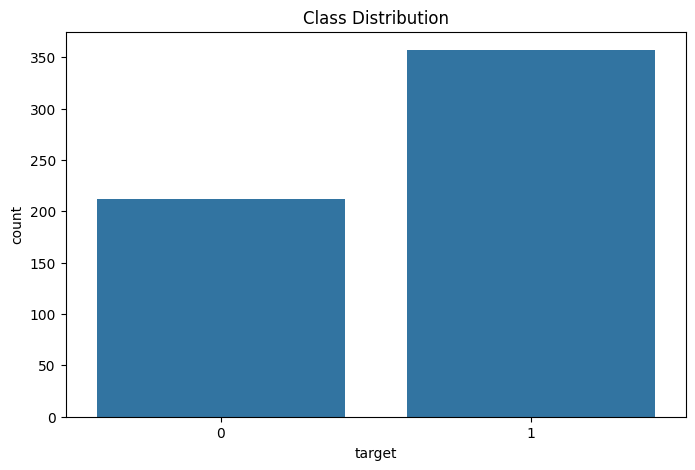

In [ ]:
# --------------------------------
# Step 6: Data Visualization
# --------------------------------
plt.figure(figsize=(8, 5))
sns.countplot(x=df["target"])
plt.title("Class Distribution")
plt.show()

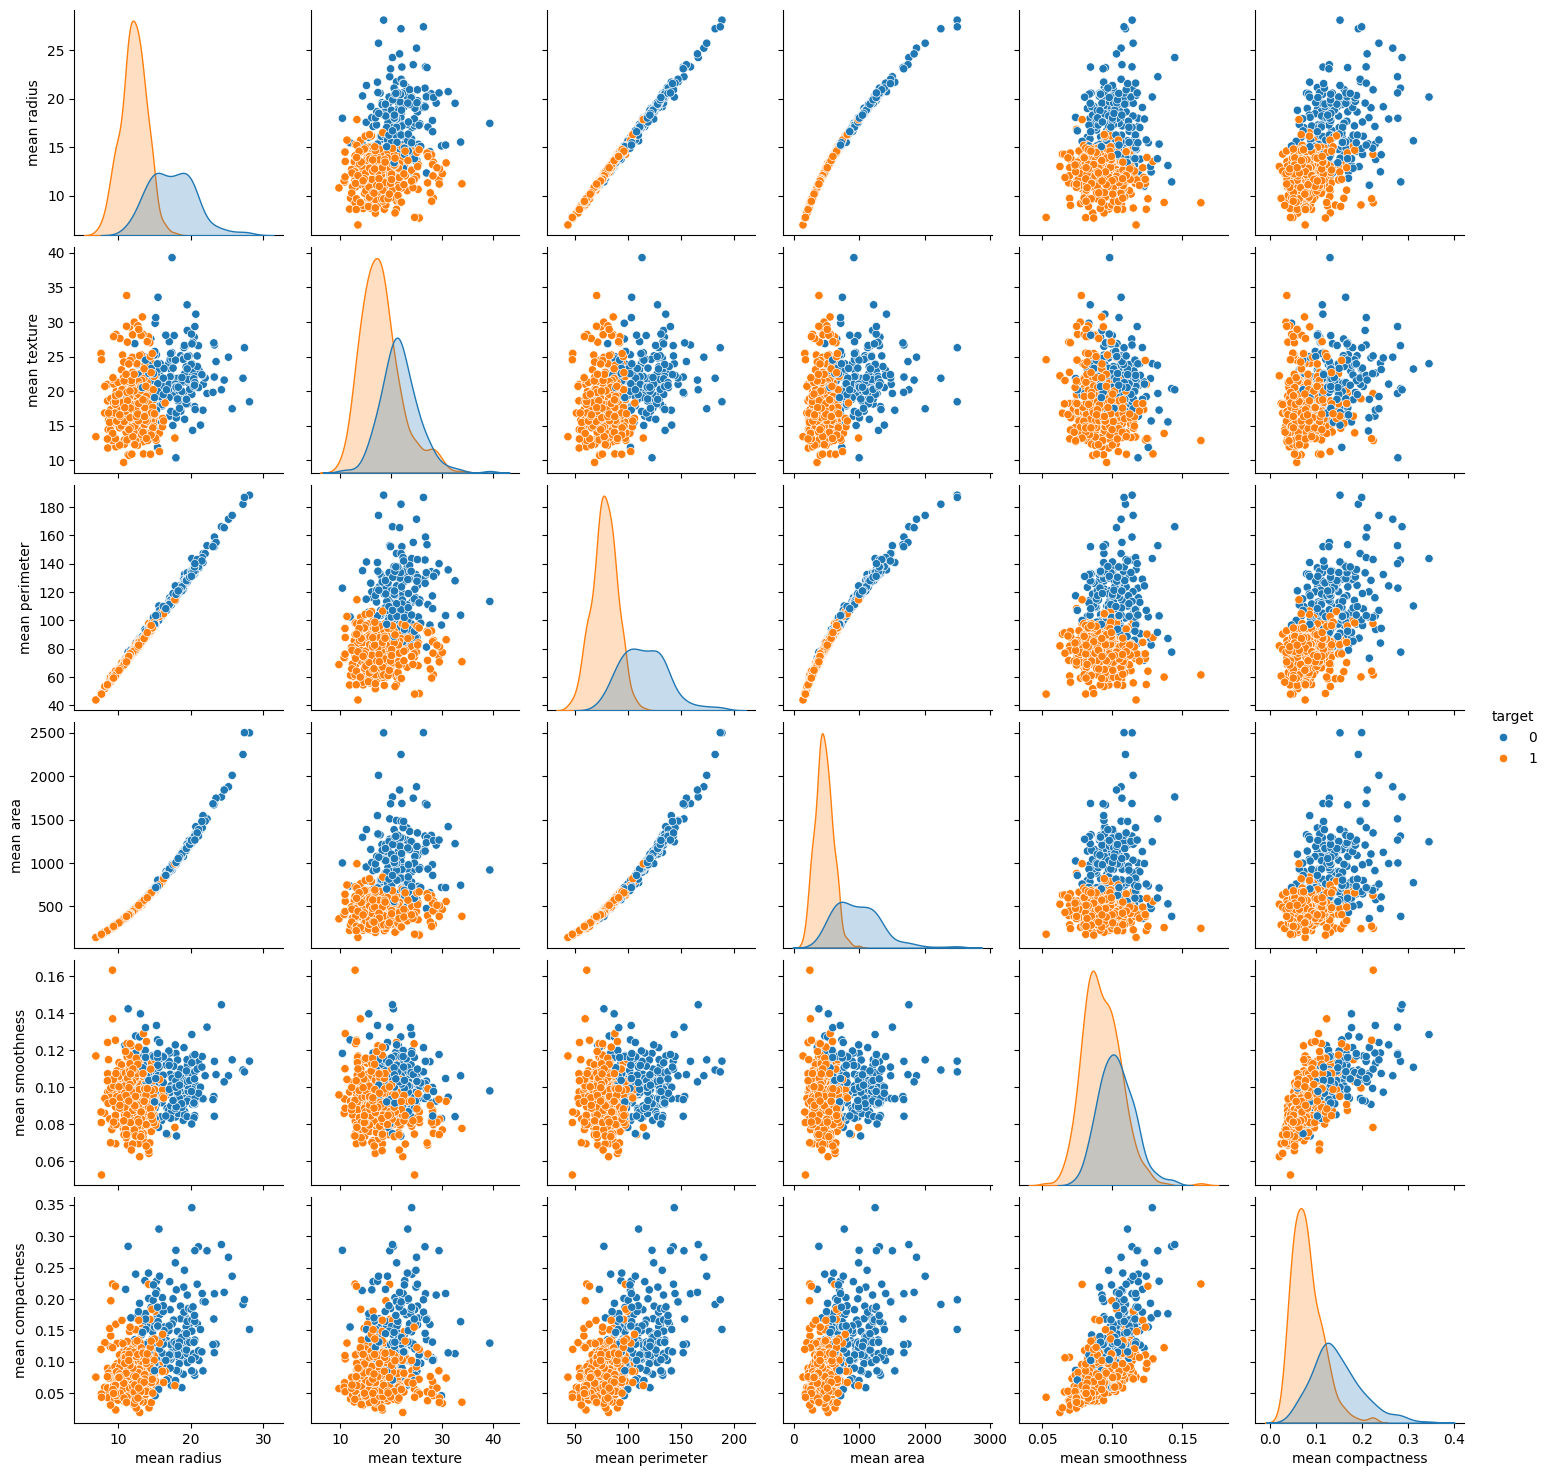

In [ ]:
sns.pairplot(df.iloc[:, :6].join(df["target"]), hue="target")
plt.show()

In [ ]:
# --------------------------------
# Step 7: Train-Test Split
# --------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
# --------------------------------
# Step 8: Build Models
# --------------------------------
log_model = LogisticRegression(max_iter=2000)
svm_model = SVC(kernel='rbf', probability=True)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
log_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
pred_log = log_model.predict(X_test)
pred_svm = svm_model.predict(X_test)
pred_rf = rf_model.predict(X_test)

In [ ]:
print("\nAccuracies:")
print("Logistic Regression:", accuracy_score(y_test, pred_log))
print("SVM:", accuracy_score(y_test, pred_svm))
print("Random Forest:", accuracy_score(y_test, pred_rf))


Accuracies:
Logistic Regression: 0.9736842105263158
SVM: 0.9736842105263158
Random Forest: 0.9649122807017544


In [ ]:
# --------------------------------
# Step 9: Hyperparameter Tuning (Random Forest)
# --------------------------------
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 8, 12, None]
}

grid = GridSearchCV(
    rf_model,
    param_grid,
    scoring="accuracy",
    cv=5
)

grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)

best_rf = grid.best_estimator_
best_pred = best_rf.predict(X_test)

print("Tuned RF Accuracy:", accuracy_score(y_test, best_pred))
print("Classification Report:\n", classification_report(y_test, best_pred))


Best Parameters: {'max_depth': 8, 'n_estimators': 200}
Tuned RF Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
# --------------------------------
# Step 10: Save the Model
# --------------------------------
pickle.dump(best_rf, open("breast_cancer_model.pkl", "wb"))
print("Model saved as breast_cancer_model.pkl")

Model saved as breast_cancer_model.pkl


In [ ]:
# To Load
loaded_model = pickle.load(open("breast_cancer_model.pkl", "rb"))
print("Loaded Model Prediction:", loaded_model.predict(X_test[:1]))

Loaded Model Prediction: [1]
